In [1]:
from typing import Tuple
import numpy as np
from matplotlib import pyplot as plt

from oli.math.math_utility import pretty_print_matrix

## Kernel & Convolution:
- A kernel is a matrix of weights learned using backpropagation.
- Represents a receptive field.
- Is shifted by the stride along the input.
- Output size is determined by the kernel size and the stride.
- Applying a kernel to an input is called convolution.
- Can be viewed as a dot product between the kernel and the input.
- The outputs are called feature maps.
    - The amount of feature maps is equal to the amount of kernels.
    - They are also called channels.

The following kernel is of size $W_{kernel} = 3$ and $H_{kernel} = 1$ There are 3 kernels in total leading to 3 feature maps (output channels). The stride is set to $s = 1$.

In [2]:
X = np.array([5, 6, 6, 2, 5, 6])

kernel_list = [
    [1, -1, 1],
    [0, 0, 1],
    [0, 0, 0],
    [1, 1, 1]
]
amout_of_kernels = len(kernel_list)
kernel_width = len(kernel_list[0])
kernel_height = 1
amount_of_strides = int(len(X) / kernel_width)

print("Amount of kernels: ", amout_of_kernels)
print("Kernel width: ", kernel_width)
print("Kernel height: ", kernel_height)
print("Amount of strides: ", amount_of_strides)

Amount of kernels:  4
Kernel width:  3
Kernel height:  1
Amount of strides:  2


In [3]:
for i in range(0, amount_of_strides):
    current_visible_x = X[i:i + kernel_width]
    for kernel in kernel_list:
        pretty_print_matrix(current_visible_x, "X slice currently visible to the kernel:")
        pretty_print_matrix(kernel, "Kernel:")
        print("Convolution:", np.tensordot(current_visible_x, kernel, axes=1))
        print()
    print()

X slice currently visible to the kernel:
[
  5 
  6 
  6 
]
Kernel:
[
  1 
  -1 
  1 
]
Convolution: 5

X slice currently visible to the kernel:
[
  5 
  6 
  6 
]
Kernel:
[
  0 
  0 
  1 
]
Convolution: 6

X slice currently visible to the kernel:
[
  5 
  6 
  6 
]
Kernel:
[
  0 
  0 
  0 
]
Convolution: 0

X slice currently visible to the kernel:
[
  5 
  6 
  6 
]
Kernel:
[
  1 
  1 
  1 
]
Convolution: 17


X slice currently visible to the kernel:
[
  6 
  6 
  2 
]
Kernel:
[
  1 
  -1 
  1 
]
Convolution: 2

X slice currently visible to the kernel:
[
  6 
  6 
  2 
]
Kernel:
[
  0 
  0 
  1 
]
Convolution: 2

X slice currently visible to the kernel:
[
  6 
  6 
  2 
]
Kernel:
[
  0 
  0 
  0 
]
Convolution: 0

X slice currently visible to the kernel:
[
  6 
  6 
  2 
]
Kernel:
[
  1 
  1 
  1 
]
Convolution: 14




### 2D Convolution:

In [4]:
test_x = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])
test_kernel = np.array([
    [2, 0, 2],
    [2, 2, 2],
    [0, 2, 2]
])
print(test_x.shape)
print(test_kernel.shape)
np.tensordot(test_x, test_kernel, axes=2)

(3, 3)
(3, 3)


array(8)

In [5]:
X = np.array([
    [2, 0, 2, 2, 0],
    [2, 2, 2, 2, 2],
    [0, 2, 2, 2, 0],
    [0, 2, 2, 2, 0],
    [0, 0, 2, 0, 0]
])

kernel_list = [
    np.array([
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]),
    np.array([
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ]),
    np.array([
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ])
]

amout_of_kernels = len(kernel_list)
kernel_height = len(kernel_list[0])
kernel_width = len(kernel_list[0][0])
stride = 2
amount_of_strides_x = int((len(X) - kernel_width) / stride) + 1
amount_of_strides_y = int((len(X[0]) - kernel_height) / stride) + 1

print("Amount of kernels: ", amout_of_kernels)
print("Kernel width: ", kernel_width)
print("Kernel height: ", kernel_height)
print("Amount of strides x: ", amount_of_strides_x)
print("Amount of strides y: ", amount_of_strides_y)

Amount of kernels:  3
Kernel width:  3
Kernel height:  3
Amount of strides x:  2
Amount of strides y:  2


In [6]:
for y in range(0, amount_of_strides_y):
    for x in range(0, amount_of_strides_x):
        current_visible = X[y:y + kernel_height, x:x + kernel_width]
        for kernel in kernel_list:
            pretty_print_matrix(current_visible, "X slice currently visible to the kernel:")
            pretty_print_matrix(kernel, "Kernel:")
            print("Convolution: ", np.tensordot(current_visible, kernel, axes=2))
            print()
        print()

X slice currently visible to the kernel:
[
  2 0 2 
  2 2 2 
  0 2 2 
]
Kernel:
[
  1 0 1 
  0 1 0 
  1 0 1 
]
Convolution:  8

X slice currently visible to the kernel:
[
  2 0 2 
  2 2 2 
  0 2 2 
]
Kernel:
[
  0 1 0 
  1 0 1 
  0 1 0 
]
Convolution:  6

X slice currently visible to the kernel:
[
  2 0 2 
  2 2 2 
  0 2 2 
]
Kernel:
[
  1 0 1 
  0 1 0 
  1 0 1 
]
Convolution:  8


X slice currently visible to the kernel:
[
  0 2 2 
  2 2 2 
  2 2 2 
]
Kernel:
[
  1 0 1 
  0 1 0 
  1 0 1 
]
Convolution:  8

X slice currently visible to the kernel:
[
  0 2 2 
  2 2 2 
  2 2 2 
]
Kernel:
[
  0 1 0 
  1 0 1 
  0 1 0 
]
Convolution:  8

X slice currently visible to the kernel:
[
  0 2 2 
  2 2 2 
  2 2 2 
]
Kernel:
[
  1 0 1 
  0 1 0 
  1 0 1 
]
Convolution:  8


X slice currently visible to the kernel:
[
  2 2 2 
  0 2 2 
  0 2 2 
]
Kernel:
[
  1 0 1 
  0 1 0 
  1 0 1 
]
Convolution:  8

X slice currently visible to the kernel:
[
  2 2 2 
  0 2 2 
  0 2 2 
]
Kernel:
[
  0 1 0 
  1 0 1 
  

# FashionMNIST classification using pytorch
[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)

In [7]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchvision.transforms import transforms
from torchvision.datasets import FashionMNIST

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [9]:
fashion_mnist_train = FashionMNIST(root="../../../data/fashion-mnist", download=True, train=True, transform=transforms.ToTensor())
fashion_mnist_test = FashionMNIST(root="../../../data/fashion-mnist", download=True, train=False, transform=transforms.ToTensor())

train_data_loader = DataLoader(fashion_mnist_train, batch_size=64, shuffle=True)
test_data_loader = DataLoader(fashion_mnist_test, batch_size=64, shuffle=False)

In [10]:
np.bincount(fashion_mnist_train.targets.numpy())

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

In [11]:
np.bincount(fashion_mnist_test.targets.numpy())

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64)

In [12]:
label_names = np.array([
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
])

In [13]:
fashion_mnist_train.data[i].shape

torch.Size([28, 28])

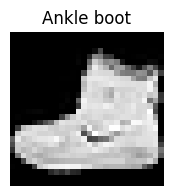

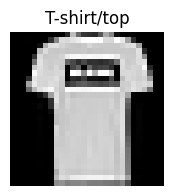

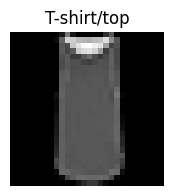

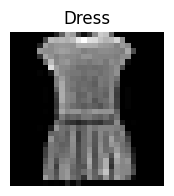

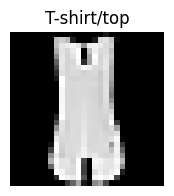

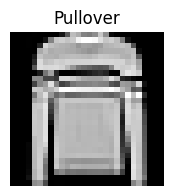

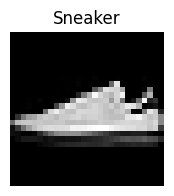

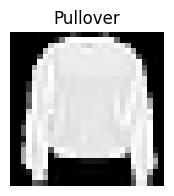

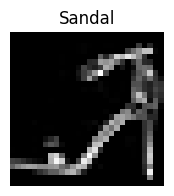

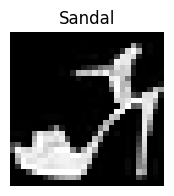

In [14]:
for i in range(10):
    current_image = fashion_mnist_train.data[i].numpy()
    label = fashion_mnist_train.targets[i]
    plt.figure(figsize=(2, 2))
    plt.imshow(current_image, cmap="gray")
    plt.title(label_names[label])
    plt.axis("off")
    plt.show()

In [15]:
class Classifier(nn.Module):
    network: nn.Sequential

    def __init__(self):
        super().__init__()
        # in_channels are 1 because images are grayscale
        # out_channels describe the number of filters / kernels to be applied
        # Padding is applied to the input on all sides of the input
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, padding=1, stride=1),

            nn.Flatten(),
            nn.Linear(in_features=36864, out_features=10000),
            nn.ReLU(),
            nn.Linear(10000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 10)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x)

    def fit(self, epochs: int, train_data_loader: DataLoader, test_data_loader: DataLoader, learning_rate: float = 0.001):
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        history = []
        for epoch in range(epochs):
            batch_losses = [self.train_step(batch[0].to(device), batch[1].to(device), optimizer) for batch in train_data_loader]
            test_metrics = [self.test_step(batch[0].to(device), batch[1].to(device)) for batch in test_data_loader]
            metrics: dict = {
                "epoch": epoch,
                "train_loss": sum(batch_losses)/len(batch_losses),
                "test_loss": sum([metric[0] for metric in test_metrics])/len(test_metrics),
                "test_accuracy": sum([metric[1] for metric in test_metrics])/len(test_metrics)
            }
            print(metrics)
            history.append(metrics)
        print("Training finished")
        print(history)

    def train_step(self, image: torch.Tensor, label: torch.Tensor, optimizer: Adam) -> torch.Tensor:
        predictions: torch.Tensor = self(image)
        loss = F.cross_entropy(predictions, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Loss: {loss.item()}")
        return loss.cpu().detach()

    def test_step(self, images: torch.Tensor, labels: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        predictions = self(images)
        loss = self.loss_function(predictions, labels)
        accuracy = self.accuracy(predictions, labels)
        return loss.cpu().detach(), accuracy.cpu().detach()

    def predict(self, images: torch.Tensor) -> torch.Tensor:
        predictions = self(images)
        return predictions.argmax(dim=1).cpu().detach()


In [16]:
model = Classifier().cuda()
model.fit(epochs=1, train_data_loader=train_data_loader, test_data_loader=test_data_loader)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x18432 and 36864x10000)

In [ ]:
y_true = []
y_pred = []
for batch in test_data_loader:
    y_true.extend(batch[1].numpy())
    y_pred.extend(model.predict(batch[0]).numpy())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.show()

print(classification_report(y_true, y_pred, target_names=label_names))